In [433]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [434]:
df_train = pd.read_csv('/Users/tshmacm1173/Desktop/Sprint 6 ML/Traffic_Jam_Analysis/train_revised.csv')

In [435]:
df_train.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [436]:
df_test = pd.read_csv('/Users/tshmacm1173/Desktop/Sprint 6 ML/Traffic_Jam_Analysis/test_questions.csv') 

In [437]:
df_test.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11


In [438]:

df_test["travel_date"] = pd.to_datetime(df_test["travel_date"])
df_test["year"] = df_test["travel_date"].dt.year
df_test["month"] = df_test["travel_date"].dt.month
df_test["day"] = df_test["travel_date"].dt.day
df_test["weekday"] = df_test["travel_date"].dt.weekday
df_test["is_weekend"] = df_test["weekday"].apply(lambda x: 1 if x >= 5 else 0)

df_test['hour'] = df_test['travel_time'].str.split(':').str[0].astype(int)  
df_test['minute'] = df_test['travel_time'].str.split(':').str[1].astype(int) 
 
df_test.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,year,month,day,weekday,is_weekend,hour,minute
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49,2018,5,7,0,0,7,6
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11,2018,5,6,6,1,11,8
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11,2018,5,4,4,0,5,0
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11,2018,5,4,4,0,9,10
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11,2018,5,4,4,0,9,20


In [439]:

df_train['travel_date'] = pd.to_datetime(df_train['travel_date'], format='%d-%m-%y')
df_train['year'] = df_train['travel_date'].dt.year  
df_train['month'] = df_train['travel_date'].dt.month  
df_train['day'] = df_train['travel_date'].dt.day 
df_train["weekday"] = df_train["travel_date"].dt.weekday
df_train["is_weekend"] = df_train["weekday"].apply(lambda x: 1 if x >= 5 else 0) 

df_train['hour'] = df_train['travel_time'].str.split(':').str[0].astype(int)  
df_train['minute'] = df_train['travel_time'].str.split(':').str[1].astype(int) 
 
df_train.head()  

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,year,month,day,weekday,is_weekend,hour,minute
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,2017,10,17,1,0,7,15
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,2017,11,19,6,1,7,12
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,2017,11,26,6,1,7,5
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,2017,11,27,0,0,7,10
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,2017,11,27,0,0,7,12


Calculating Number Of Tickets:

In [440]:

df_train_tickets = df_train.groupby("ride_id").size().reset_index(name="number_of_tickets")
df_train = df_train.merge(df_train_tickets, on="ride_id")
df_train.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,year,month,day,weekday,is_weekend,hour,minute,number_of_tickets
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,2017,10,17,1,0,7,15,1
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,2017,11,19,6,1,7,12,1
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,2017,11,26,6,1,7,5,1
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,2017,11,27,0,0,7,10,5
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,2017,11,27,0,0,7,12,31


## Explotary Data Analysis:

In [441]:
# !pip install  sweetviz
# import sweetviz as sv
# report = sv.analyze(df_train)
# report.show_html("claims_analysis_sweetviz_report.html")
# report.show_notebook()

Calculating Average Number Of Tickets:

In [442]:

average_tickets = round(df_train["number_of_tickets"].mean())
print(f"Average number of tickets: {average_tickets}")


Average number of tickets: 17


Visulizing Target Variable distribution:

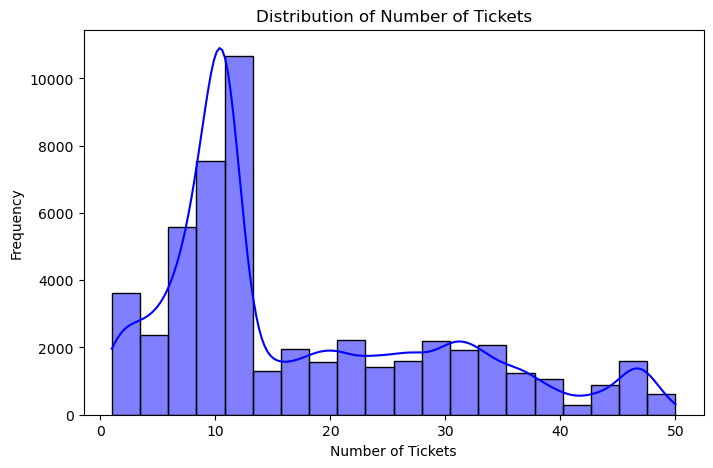

In [443]:

plt.figure(figsize=(8, 5))
sns.histplot(df_train["number_of_tickets"], bins=20, kde=True, color="blue")
plt.title("Distribution of Number of Tickets")
plt.xlabel("Number of Tickets")
plt.ylabel("Frequency")
plt.show()

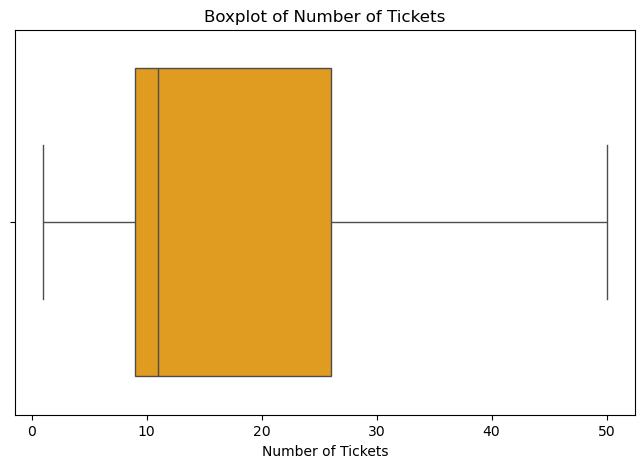

In [444]:

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_train["number_of_tickets"], color="orange")
plt.title("Boxplot of Number of Tickets")
plt.xlabel("Number of Tickets")
plt.show()

Visualizing The Relationship Between Features And Target Variables:

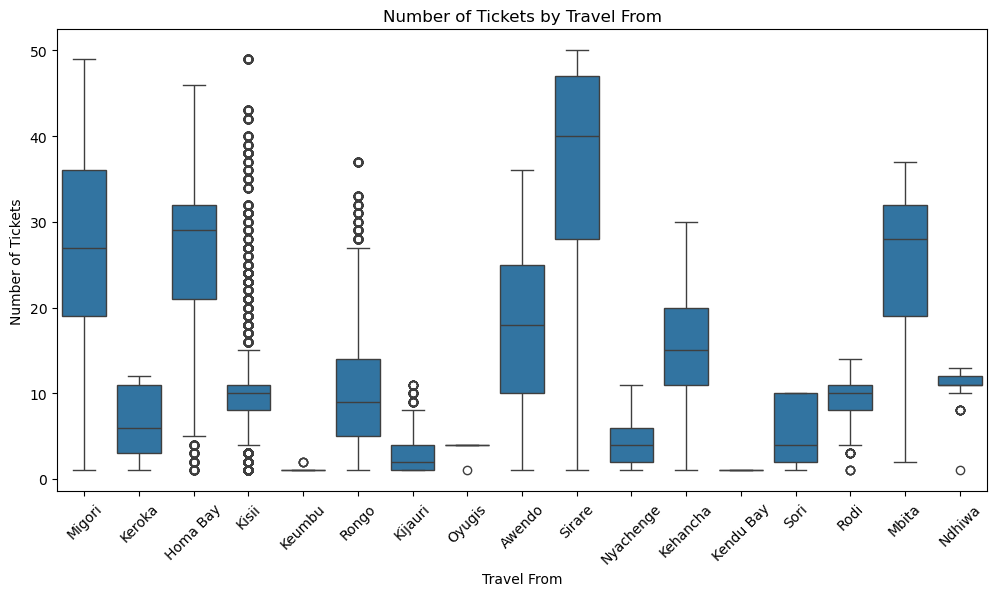

In [445]:

plt.figure(figsize=(12, 6))
sns.boxplot(x="travel_from", y="number_of_tickets", data=df_train)
plt.title("Number of Tickets by Travel From")
plt.xlabel("Travel From")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=45)
plt.show()

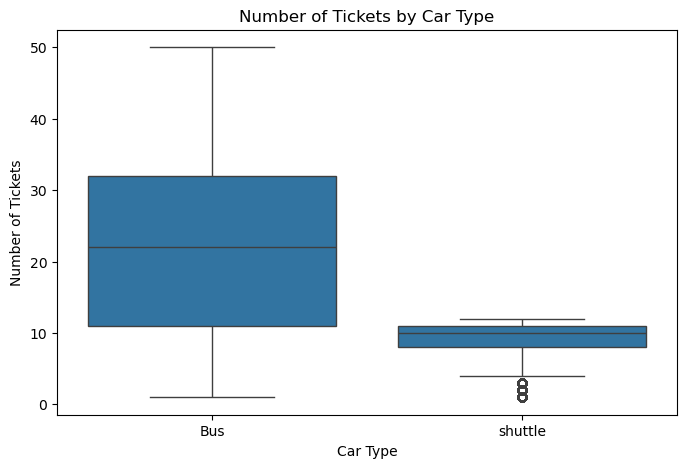

In [446]:

plt.figure(figsize=(8, 5))
sns.boxplot(x="car_type", y="number_of_tickets", data=df_train)
plt.title("Number of Tickets by Car Type")
plt.xlabel("Car Type")
plt.ylabel("Number of Tickets")
plt.show()

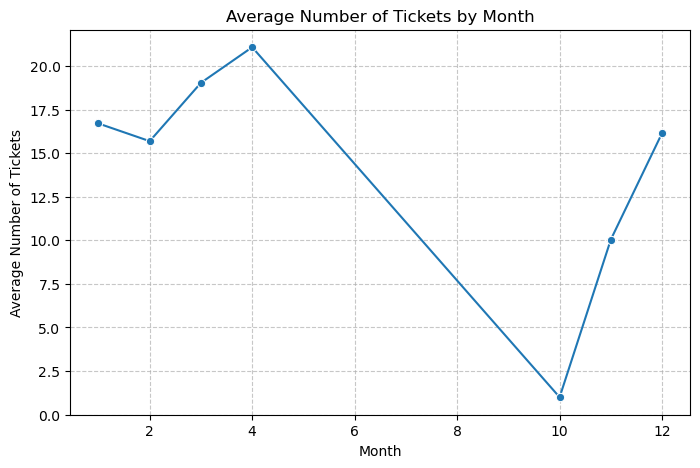

In [447]:

monthly_tickets = df_train.groupby("month")["number_of_tickets"].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.lineplot(x="month", y="number_of_tickets", data=monthly_tickets, marker="o")
plt.title("Average Number of Tickets by Month")
plt.xlabel("Month")
plt.ylabel("Average Number of Tickets")
plt.grid(axis='both', linestyle='--', alpha=0.7)  
plt.show()

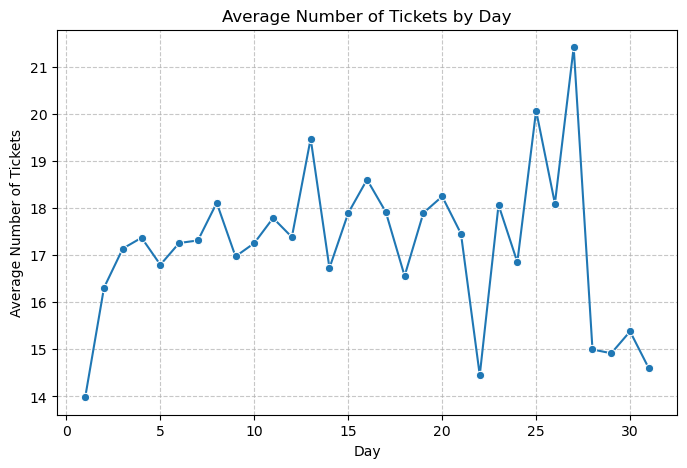

In [448]:

daily_tickets = df_train.groupby("day")["number_of_tickets"].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.lineplot(x="day", y="number_of_tickets", data=daily_tickets, marker="o")
plt.title("Average Number of Tickets by Day")
plt.xlabel("Day")
plt.ylabel("Average Number of Tickets")
plt.grid(axis='both', linestyle='--', alpha=0.7)  
plt.show()

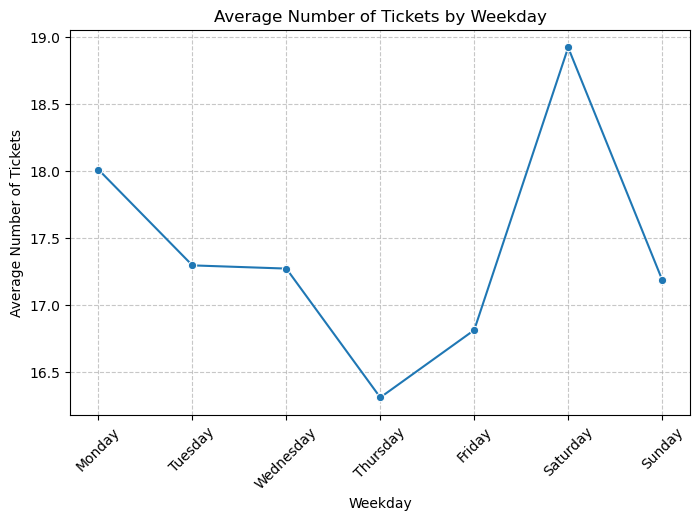

In [449]:

weekday_map = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}
weekdaily_tickets = df_train.groupby("weekday")["number_of_tickets"].mean().reset_index()
weekdaily_tickets["weekday"] = weekdaily_tickets["weekday"].map(weekday_map)
plt.figure(figsize=(8, 5))
sns.lineplot(x="weekday", y="number_of_tickets", data=weekdaily_tickets, marker="o")
plt.title("Average Number of Tickets by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Average Number of Tickets")
plt.xticks(rotation=45)  
plt.grid(axis='both', linestyle='--', alpha=0.7)  
plt.show()

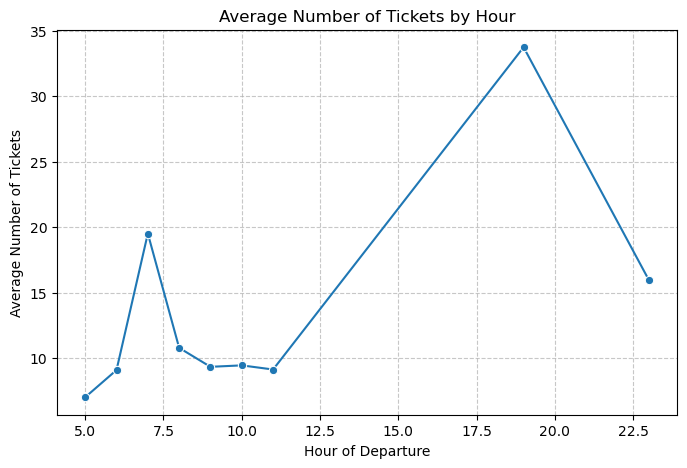

In [450]:

hourly_tickets = df_train.groupby("hour")["number_of_tickets"].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.lineplot(x="hour", y="number_of_tickets", data=hourly_tickets, marker="o")
plt.title("Average Number of Tickets by Hour")
plt.xlabel("Hour of Departure")
plt.ylabel("Average Number of Tickets")
plt.grid(axis='both', linestyle='--', alpha=0.7)  
plt.show()

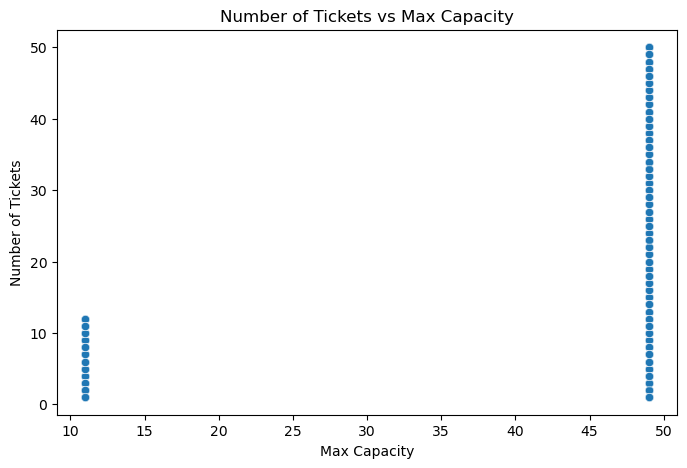

In [451]:

plt.figure(figsize=(8, 5))
sns.scatterplot(x="max_capacity", y="number_of_tickets", data=df_train, alpha=0.7)
plt.title("Number of Tickets vs Max Capacity")
plt.xlabel("Max Capacity")
plt.ylabel("Number of Tickets")
plt.show()

## Feature Engineering And Selection:

In [452]:
df_train.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,year,month,day,weekday,is_weekend,hour,minute,number_of_tickets
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,2017,10,17,1,0,7,15,1
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,2017,11,19,6,1,7,12,1
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,2017,11,26,6,1,7,5,1
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,2017,11,27,0,0,7,10,5
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,2017,11,27,0,0,7,12,31


In [453]:

df_train = df_train.drop(columns=["seat_number", "payment_receipt","travel_to","travel_date","travel_time"])
df_train.head()

,ride_id,payment_method,travel_from,car_type,max_capacity,year,month,day,weekday,is_weekend,hour,minute,number_of_tickets
0,1442,Mpesa,Migori,Bus,49,2017,10,17,1,0,7,15,1
1,5437,Mpesa,Migori,Bus,49,2017,11,19,6,1,7,12,1
2,5710,Mpesa,Keroka,Bus,49,2017,11,26,6,1,7,5,1
3,5777,Mpesa,Homa Bay,Bus,49,2017,11,27,0,0,7,10,5
4,5778,Mpesa,Migori,Bus,49,2017,11,27,0,0,7,12,31


In [454]:

df_train = pd.get_dummies(df_train, columns=['payment_method'], drop_first=True)
df_train = pd.get_dummies(df_train, columns=['car_type'], drop_first=True)

In [455]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df_train["travel_from"] = encoder.fit_transform(df_train[["travel_from"]]).astype(int)
df_train.head()

,ride_id,travel_from,max_capacity,year,month,day,weekday,is_weekend,hour,minute,number_of_tickets,payment_method_Mpesa,car_type_shuttle
0,1442,9,49,2017,10,17,1,0,7,15,1,True,False
1,5437,9,49,2017,11,19,6,1,7,12,1,True,False
2,5710,4,49,2017,11,26,6,1,7,5,1,True,False
3,5777,1,49,2017,11,27,0,0,7,10,5,True,False
4,5778,9,49,2017,11,27,0,0,7,12,31,True,False


In [456]:
df_test.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,year,month,day,weekday,is_weekend,hour,minute
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49,2018,5,7,0,0,7,6
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11,2018,5,6,6,1,11,8
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11,2018,5,4,4,0,5,0
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11,2018,5,4,4,0,9,10
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11,2018,5,4,4,0,9,20


In [457]:
df_test = df_test.drop(columns=["travel_to","travel_date","travel_time"])
df_test.head()

,ride_id,travel_from,car_type,max_capacity,year,month,day,weekday,is_weekend,hour,minute
0,247,Kisii,Bus,49,2018,5,7,0,0,7,6
1,256,Kisii,shuttle,11,2018,5,6,6,1,11,8
2,275,Kisii,shuttle,11,2018,5,4,4,0,5,0
3,285,Kisii,shuttle,11,2018,5,4,4,0,9,10
4,286,Kisii,shuttle,11,2018,5,4,4,0,9,20


In [458]:

df_test = pd.get_dummies(df_test, columns=['car_type'], drop_first=True)

In [459]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df_test["travel_from"] = encoder.fit_transform(df_test[["travel_from"]]).astype(int)
df_test.head()

,ride_id,travel_from,max_capacity,year,month,day,weekday,is_weekend,hour,minute,car_type_shuttle
0,247,5,49,2018,5,7,0,0,7,6,False
1,256,5,11,2018,5,6,6,1,11,8,True
2,275,5,11,2018,5,4,4,0,5,0,True
3,285,5,11,2018,5,4,4,0,9,10,True
4,286,5,11,2018,5,4,4,0,9,20,True


Correlation Analysis 

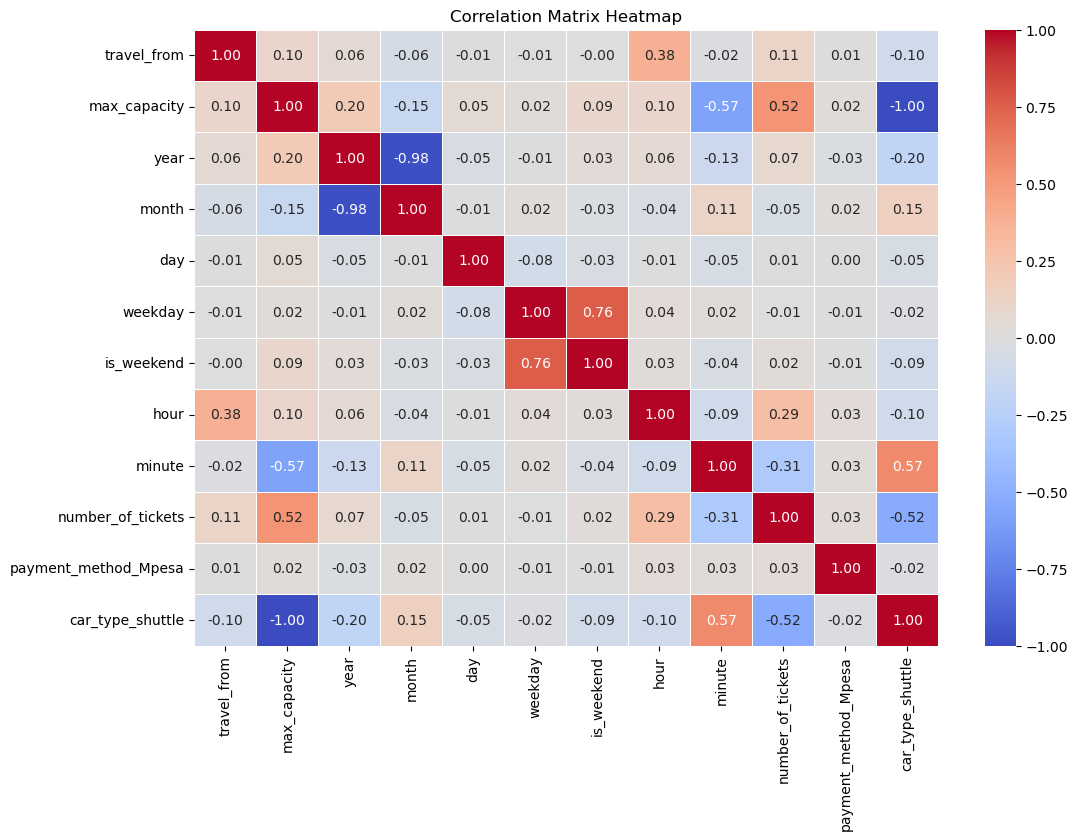

In [460]:

correlation_matrix = df_train.drop(columns='ride_id').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [461]:
df_train.head()

,ride_id,travel_from,max_capacity,year,month,day,weekday,is_weekend,hour,minute,number_of_tickets,payment_method_Mpesa,car_type_shuttle
0,1442,9,49,2017,10,17,1,0,7,15,1,True,False
1,5437,9,49,2017,11,19,6,1,7,12,1,True,False
2,5710,4,49,2017,11,26,6,1,7,5,1,True,False
3,5777,1,49,2017,11,27,0,0,7,10,5,True,False
4,5778,9,49,2017,11,27,0,0,7,12,31,True,False


In [462]:
df_train.columns

Index(['ride_id', 'travel_from', 'max_capacity', 'year', 'month', 'day',
       'weekday', 'is_weekend', 'hour', 'minute', 'number_of_tickets',
       'payment_method_Mpesa', 'car_type_shuttle'],
      dtype='object')

Feature Importance Using Random Forest

In [463]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
X = df_train.drop(columns=['number_of_tickets', 'ride_id'])  
y = df_train['number_of_tickets']
model = RandomForestRegressor(random_state=42)
model.fit(X, y)
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)
print("Feature Importances:")
print(feature_importances)
selector = SelectKBest(score_func=f_regression, k="all")
selector.fit(X, y)
feature_scores = pd.DataFrame({
    "Feature": X.columns,
    "Score": selector.scores_
}).sort_values(by="Score", ascending=False)
print("Feature Scores:")
print(feature_scores)

Feature Importances:
                 Feature  Importance
0            travel_from    0.263794
8                 minute    0.178929
10      car_type_shuttle    0.159620
4                    day    0.129470
1           max_capacity    0.115550
3                  month    0.064526
5                weekday    0.058499
7                   hour    0.019629
6             is_weekend    0.006024
2                   year    0.003710
9   payment_method_Mpesa    0.000250
Feature Scores:
                 Feature         Score
10      car_type_shuttle  19571.211639
1           max_capacity  19571.211639
8                 minute   5351.665647
7                   hour   4802.948365
0            travel_from    648.532742
2                   year    291.756941
3                  month    114.399430
9   payment_method_Mpesa     61.356719
6             is_weekend     30.215245
5                weekday      1.921135
4                    day      1.746440


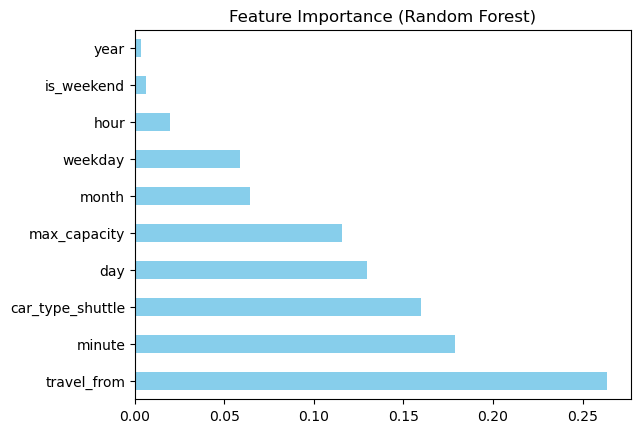

In [464]:
from sklearn.ensemble import RandomForestRegressor
X = df_train.drop(columns=['number_of_tickets', 'ride_id'])  
y = df_train['number_of_tickets']
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title("Feature Importance (Random Forest)")
plt.show()


In [465]:
df_train.head()

,ride_id,travel_from,max_capacity,year,month,day,weekday,is_weekend,hour,minute,number_of_tickets,payment_method_Mpesa,car_type_shuttle
0,1442,9,49,2017,10,17,1,0,7,15,1,True,False
1,5437,9,49,2017,11,19,6,1,7,12,1,True,False
2,5710,4,49,2017,11,26,6,1,7,5,1,True,False
3,5777,1,49,2017,11,27,0,0,7,10,5,True,False
4,5778,9,49,2017,11,27,0,0,7,12,31,True,False


In [466]:
df_train.columns

Index(['ride_id', 'travel_from', 'max_capacity', 'year', 'month', 'day',
       'weekday', 'is_weekend', 'hour', 'minute', 'number_of_tickets',
       'payment_method_Mpesa', 'car_type_shuttle'],
      dtype='object')

Split into Training & Testing Sets:

In [467]:
from sklearn.model_selection import train_test_split

X = df_train[["travel_from","car_type_shuttle","hour","minute","month","day","weekday","max_capacity"]] 
y = df_train['number_of_tickets']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Standardize features:

In [468]:
scaler = StandardScaler()
X_train[['max_capacity', 'hour', 'minute','travel_from','car_type_shuttle','month','day','weekday']] = scaler.fit_transform(X_train[['max_capacity', 'hour', 'minute','travel_from','car_type_shuttle','month','day','weekday']])
X_test[['max_capacity', 'hour', 'minute','travel_from','car_type_shuttle','month','day','weekday']] = scaler.transform(X_test[['max_capacity', 'hour', 'minute','travel_from','car_type_shuttle','month','day','weekday']])

Train Regression Model:

In [469]:

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Evaluate Performance:

In [470]:
from sklearn.metrics import mean_absolute_error
import numpy as np
mae = mean_absolute_error(y_test, y_pred)  
 

print(f" Mean Absolute Error (MAE): {mae:.2f}")
print(f" Predicted_Tickets_Sales:  {y_pred}")


 Mean Absolute Error (MAE): 0.14
 Predicted_Tickets_Sales:  [11.   20.   28.   ... 31.    3.38 23.  ]


In [471]:
from joblib import dump, load
dump(model, 'random_forest_model_vision2_mk.joblib')

['random_forest_model_vision2_mk.joblib']

In [472]:
X_Test_test = df_test[["travel_from","car_type_shuttle","hour","minute","month","day","weekday","max_capacity"]]

In [473]:
scaler = StandardScaler()
X_Test_test[['max_capacity', 'hour', 'minute','travel_from','car_type_shuttle','month','day','weekday']] = scaler.fit_transform(X_Test_test[['max_capacity', 'hour', 'minute','travel_from','car_type_shuttle','month','day','weekday']])

In [474]:
df_test['number_of_ticket'] = model.predict(X_Test_test) 
df_test.to_csv('test_with_predicted_No_Tickets.csv', index=False)  

In [475]:
df_test.head()

,ride_id,travel_from,max_capacity,year,month,day,weekday,is_weekend,hour,minute,car_type_shuttle,number_of_ticket
0,247,5,49,2018,5,7,0,0,7,6,False,1.99
1,256,5,11,2018,5,6,6,1,11,8,True,3.34
2,275,5,11,2018,5,4,4,0,5,0,True,1.94
3,285,5,11,2018,5,4,4,0,9,10,True,2.72
4,286,5,11,2018,5,4,4,0,9,20,True,2.48


In [476]:

df_test["number_of_ticket"] = df_test["number_of_ticket"].round().astype(int)
df_test.head()

,ride_id,travel_from,max_capacity,year,month,day,weekday,is_weekend,hour,minute,car_type_shuttle,number_of_ticket
0,247,5,49,2018,5,7,0,0,7,6,False,2
1,256,5,11,2018,5,6,6,1,11,8,True,3
2,275,5,11,2018,5,4,4,0,5,0,True,2
3,285,5,11,2018,5,4,4,0,9,10,True,3
4,286,5,11,2018,5,4,4,0,9,20,True,2


In [477]:

predicted_results = df_test[["ride_id", "number_of_ticket"]]
predicted_results.head()

,ride_id,number_of_ticket
0,247,2
1,256,3
2,275,2
3,285,3
4,286,2


In [478]:

predicted_results.to_csv("predicted_results.csv", index=False)
print("File saved as predicted_results.csv")

File saved as predicted_results.csv
